In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head(20)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,"June 1, 2020",2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ..."
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w..."
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...


In [3]:
dummies=pd.get_dummies(df['rating'])#creating dummy variables so that we can concat it with our original database and use it further
dummies.head()


,G,NC-17,NR,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [4]:
df.release_year.mode()

0    2018
dtype: int64

In [5]:
df.release_year.fillna((2018))


0       2020
1       2016
2       2011
3       2009
4       2008
        ... 
7782    2005
7783    2015
7784    2019
7785    2019
7786    2019
Name: release_year, Length: 7787, dtype: int64

In [6]:
df.rating.mode()

0    TV-MA
dtype: object

In [7]:
df["rating"].fillna("TV-MA",inplace=True)


In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             0
duration           0
listed_in          0
description        0
dtype: int64

In [9]:
df.drop(['director','cast','date_added'],axis=1)
df=pd.concat([df,dummies],axis=1)
df.drop('rating',axis=1)


,show_id,type,title,director,cast,country,date_added,release_year,duration,listed_in,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",...,0,0,0,0,1,0,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93 min,"Dramas, International Movies",...,0,0,0,0,1,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78 min,"Horror Movies, International Movies",...,0,1,0,0,0,0,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",...,1,0,0,0,0,0,0,0,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123 min,Dramas,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,99 min,"Dramas, International Movies",...,0,0,0,0,1,0,0,0,0,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,111 min,"Dramas, International Movies, Music & Musicals",...,0,0,1,0,0,0,0,0,0,0
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,44 min,"Documentaries, International Movies, Music & M...",...,0,0,0,0,1,0,0,0,0,0
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,1 Season,"International TV Shows, Reality TV",...,0,0,0,0,0,1,0,0,0,0


In [10]:
df['country'].mode()#sice the most occuring country is US we replace the missing countries by US
df['country'].fillna("United States",inplace=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,...,0,0,0,0,1,0,0,0,0,0
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,...,0,0,0,0,1,0,0,0,0,0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,...,0,1,0,0,0,0,0,0,0,0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,...,1,0,0,0,0,0,0,0,0,0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,...,0,0,0,0,1,0,0,0,0,0
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,...,0,0,1,0,0,0,0,0,0,0
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,...,0,0,0,0,1,0,0,0,0,0
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,...,0,0,0,0,0,1,0,0,0,0


In [11]:
df['PG-13'].sum()



386

In [12]:
df['R'].sum()


665

In [13]:
df['TV-14'].sum()


1931

In [14]:
df['TV-G'].sum()


194

In [15]:
df['TV-MA'].sum() 


2863

In [16]:
df['TV-PG'].sum() 


806

In [17]:
df['TV-Y'].sum()


280

In [18]:
df['TV-Y7'].sum() 


271

In [19]:
df['TV-Y7-FV'].sum() 


6

In [20]:
df['UR'].sum()

5

In [21]:
ratings=['PG-13','R','TV-14','TV-G','TV-MA','TV-PG','TV-Y','TV-Y7','TV-Y7-FV','UR']
number=[386,665,1931,194,2863,806,280,271,6,5]

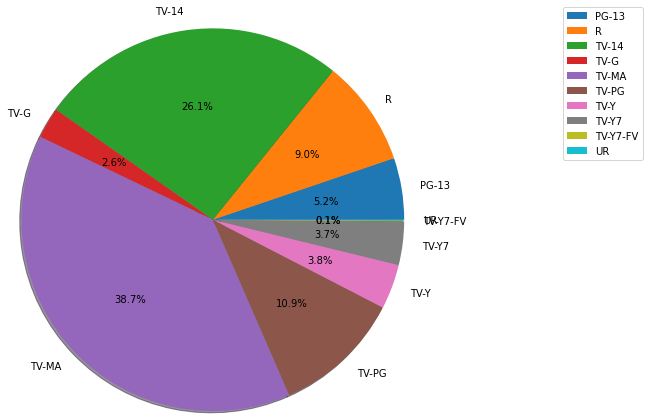

<Figure size 432x288 with 0 Axes>

In [22]:
fig,ax=plt.subplots()
ax.pie(number,labels=ratings,autopct='%1.1f%%',shadow=True,radius=2.2)
plt.legend(ratings,bbox_to_anchor=(2.5,1.5),loc="upper right")


plt.show()
plt.tight_layout()


In [23]:
#this shows that the most ratings of tv-shows/movies on netfix is of TV-MA with 38.7%

In [24]:
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

In [25]:
#this shows how many movies and how many TV-shows are there in netlfix

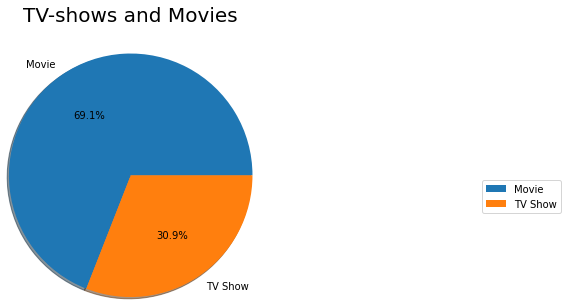

<Figure size 432x288 with 0 Axes>

In [26]:
Types=['Movie','TV Show']
count=[5377,2410]
fig,ax=plt.subplots()
ax.pie(count,labels=Types,autopct='%1.1f%%',shadow=True,radius=1.4)
plt.legend(Types,bbox_to_anchor=(2.5,0.5),loc="upper right")
plt.title("TV-shows and Movies",y=1.18,fontsize=20)


plt.show()
plt.tight_layout()


In [27]:
#checking the percentage of TV-shows and Movies on netfix / 69.1% are Movies whereas others are TV shows

In [28]:
df.sort_values(by="type",inplace=True)
df.reset_index(drop=True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,...,0,0,0,0,1,0,0,0,0,0
6614,s6615,Movie,The Longshots,Fred Durst,"Ice Cube, Keke Palmer, Tasha Smith, Jill Marie...",United States,"January 30, 2019",2008,PG,95 min,...,0,0,0,0,0,0,0,0,0,0
3866,s3867,Movie,Mahi NRI,Gaurav Bavdankar,"Harrdy Sandhu, Poppy Jabbal, Rameet Kaur, B.N....",United Kingdom,"December 1, 2019",2017,TV-14,134 min,...,0,0,1,0,0,0,0,0,0,0
6615,s6616,Movie,The Look of Silence,Joshua Oppenheimer,NaN,"Denmark, Indonesia, Finland, Norway, United Ki...","February 26, 2016",2014,PG-13,103 min,...,1,0,0,0,0,0,0,0,0,0
6616,s6617,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,s4020,TV Show,Megalobox,NaN,"Yoshimasa Hosoya, Shiro Saito, Hiroki Yasumoto...",Japan,"June 1, 2020",2018,TV-MA,1 Season,...,0,0,0,0,1,0,0,0,0,0
4020,s4021,TV Show,MegaTruckers,NaN,NaN,Australia,"July 12, 2019",2012,TV-PG,1 Season,...,0,0,0,0,0,1,0,0,0,0
4024,s4025,TV Show,Melodies of Life - Born This Way,NaN,NaN,United States,"June 21, 2019",2016,TV-14,1 Season,...,0,0,1,0,0,0,0,0,0,0
3951,s3952,TV Show,Mars,Everardo Gout,"Jihae, Alberto Ammann, Clémentine Poidatz, Ana...",United States,"November 1, 2019",2018,TV-PG,2 Seasons,...,0,0,0,0,0,1,0,0,0,0


In [29]:
df1=df.iloc[0:5377:1]
df1
#taking movies type seperately

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,...,0,0,0,0,1,0,0,0,0,0
6614,s6615,Movie,The Longshots,Fred Durst,"Ice Cube, Keke Palmer, Tasha Smith, Jill Marie...",United States,"January 30, 2019",2008,PG,95 min,...,0,0,0,0,0,0,0,0,0,0
3866,s3867,Movie,Mahi NRI,Gaurav Bavdankar,"Harrdy Sandhu, Poppy Jabbal, Rameet Kaur, B.N....",United Kingdom,"December 1, 2019",2017,TV-14,134 min,...,0,0,1,0,0,0,0,0,0,0
6615,s6616,Movie,The Look of Silence,Joshua Oppenheimer,NaN,"Denmark, Indonesia, Finland, Norway, United Ki...","February 26, 2016",2014,PG-13,103 min,...,1,0,0,0,0,0,0,0,0,0
6616,s6617,Movie,The Lord of the Rings: The Return of the King,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003,PG-13,201 min,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,s1989,Movie,EMI: Liya Hai To Chukana Padega,Saurabh Kabra,"Sanjay Dutt, Arjun Rampal, Malaika Arora, Aash...",India,"May 15, 2019",2008,TV-14,128 min,...,0,0,1,0,0,0,0,0,0,0
1763,s1764,Movie,Dilan 1991,"Fajar Bustomi, Pidi Baiq","Iqbaal Ramadhan, Vanesha Prescilla, Ira Wibowo...",Indonesia,"May 14, 2020",2019,TV-14,118 min,...,0,0,1,0,0,0,0,0,0,0
1607,s1608,Movie,Darc,Julius R. Nasso,"Tony Schiena, Armand Assante, Kippei Shiina, S...",United States,"May 1, 2018",2018,TV-MA,98 min,...,0,0,0,0,1,0,0,0,0,0
1985,s1986,Movie,Elliot the Littlest Reindeer,Jennifer Westcott,"Josh Hutcherson, Samantha Bee, Martin Short, M...",Canada,"November 1, 2020",2018,PG,90 min,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Movies vs rating')

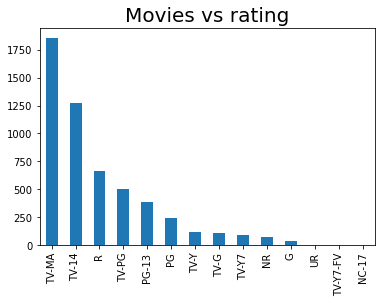

In [65]:
df1.rating.value_counts().plot.bar()
plt.title("Movies vs rating",fontsize=20)

In [31]:
#This shows that the TV-MA rating is highest in movies

In [32]:
df1['country'].mode()

0    United States
dtype: object

In [33]:
#this shows most of the movies are of United States

In [34]:
df1.country.value_counts()#after naming all the missing 507 Nan val to US,since we observed that the most of the occurence was of US.Hence it may not be fully accurate


United States                                  2080
India                                           852
United Kingdom                                  193
Canada                                          118
Egypt                                            89
                                               ... 
China, United States, Australia                   1
Poland,                                           1
United Kingdom, China, United States, India       1
Brazil, United States                             1
United States, Indonesia                          1
Name: country, Length: 590, dtype: int64

In [35]:
#here is the list of countries in the dataframe after replacing missing ones with US

In [36]:
#Now for TV-Shows

In [46]:
df2=df.iloc[5378:7877:1]
df2

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,TV-Y,TV-Y7,TV-Y7-FV,UR
6082,s6083,TV Show,The Andy Griffith Show,NaN,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,TV-G,8 Seasons,...,0,0,0,1,0,0,0,0,0,0
6417,s6418,TV Show,The Great British Baking Show: Masterclass,NaN,"Mary Berry, Paul Hollywood",United Kingdom,"December 1, 2018",2018,TV-PG,4 Seasons,...,0,0,0,0,0,1,0,0,0,0
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,...,0,0,0,0,0,0,0,1,0,0
7283,s7284,TV Show,Twirlywoos,NaN,Linda Bassett,United Kingdom,"May 15, 2020",2018,TV-Y,2 Seasons,...,0,0,0,0,0,0,1,0,0,0
7402,s7403,TV Show,Velvet Colección,NaN,"Marta Hazas, Asier Etxeandía, Adrián Lastra, D...",Spain,"February 14, 2019",2018,TV-14,2 Seasons,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,s4020,TV Show,Megalobox,NaN,"Yoshimasa Hosoya, Shiro Saito, Hiroki Yasumoto...",Japan,"June 1, 2020",2018,TV-MA,1 Season,...,0,0,0,0,1,0,0,0,0,0
4020,s4021,TV Show,MegaTruckers,NaN,NaN,Australia,"July 12, 2019",2012,TV-PG,1 Season,...,0,0,0,0,0,1,0,0,0,0
4024,s4025,TV Show,Melodies of Life - Born This Way,NaN,NaN,United States,"June 21, 2019",2016,TV-14,1 Season,...,0,0,1,0,0,0,0,0,0,0
3951,s3952,TV Show,Mars,Everardo Gout,"Jihae, Alberto Ammann, Clémentine Poidatz, Ana...",United States,"November 1, 2019",2018,TV-PG,2 Seasons,...,0,0,0,0,0,1,0,0,0,0


Text(0.5, 1.0, 'TV-Shows vs Rating')

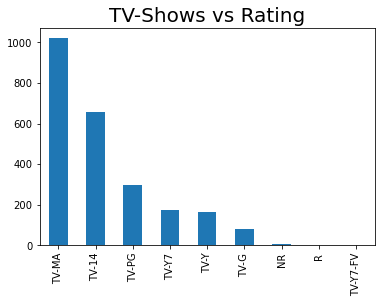

In [64]:
df2.rating.value_counts().plot.bar()
plt.title("TV-Shows vs Rating",fontsize=20)

In [52]:
#Even in TV-Shows TV-MA rating is the highest

In [53]:
df2.country.value_counts()

United States                             981
United Kingdom                            204
Japan                                     157
South Korea                               147
India                                      71
                                         ... 
France, United Kingdom, United States       1
United Kingdom, France, Germany, Spain      1
Italy, United Kingdom, France               1
Spain, Italy                                1
Canada, United Kingdom                      1
Name: country, Length: 183, dtype: int64